# Data preparation
In the lab, we use dictionary data, and need another step to turn them into form of dataframe.

But if we have csv file, we can directly load data file as form of dataframe.

In [7]:
import pandas as pd
df = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt',header = None,sep = '  \t',engine = 'python')
# categories
categories = ['text','label']
df.columns = categories

In [8]:
df

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


# Visualization of word counts
In the lab, the bar chart showed every word's counts. I think that it's not quite meaningful because a lot of words are seldom used.

I think the bar chart which shows top n popular words can give us more information of the data.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import STOPWORDS
import nltk
import helpers.data_mining_helpers as dmh
from collections import defaultdict


def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

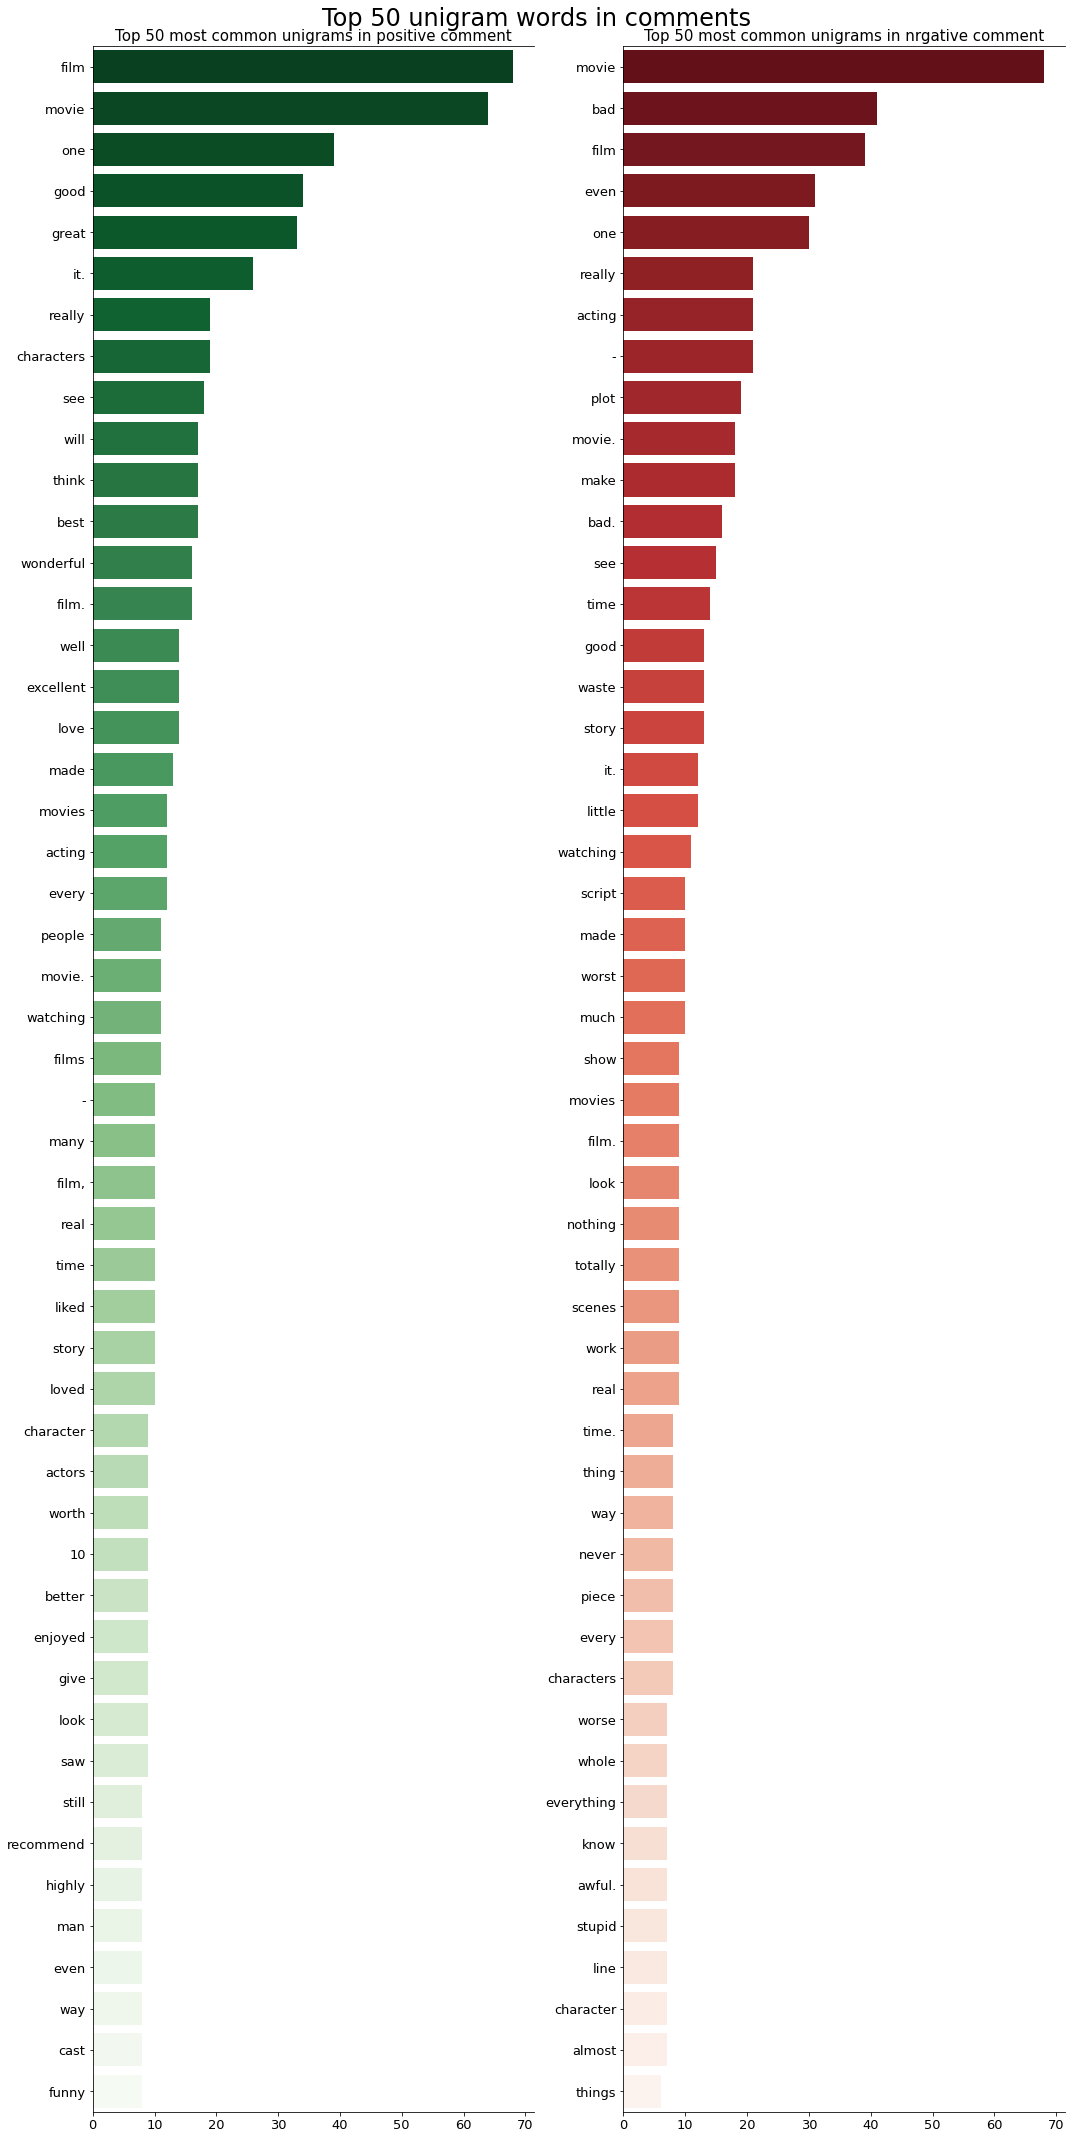

In [11]:
N = 50
label = df['label'] == 1
# Unigrams
positive_unigrams = defaultdict(int)
negative_unigrams = defaultdict(int)

#calculate the count of every unigram word
for i in df[label]['text']:
    for word in generate_ngrams(i):
        positive_unigrams[word] += 1
        
for i in df[~label]['text']:
    for word in generate_ngrams(i):
        negative_unigrams[word] += 1
        
#sort them        
df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_negative_unigrams = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])

#draw the bar chart

#we will have two plots
fig, axes = plt.subplots(ncols=2, figsize=(15, 30))

sns.set_palette("Blues")
sns.barplot(y=df_positive_unigrams[0].values[:N], 
            x=df_positive_unigrams[1].values[:N], ax=axes[0],palette=("Greens_r"))

sns.barplot(y=df_negative_unigrams[0].values[:N], 
            x=df_negative_unigrams[1].values[:N], ax=axes[1],palette=("Reds_r"))

#set some labels and titles
for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in positive comment', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in nrgative comment', fontsize=15)
fig.suptitle('Top 50 unigram words in comments', fontsize=24, va='baseline')
fig.tight_layout()

plt.show()